In [33]:
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd

!pip install xlrd
print ('xlrd installed!')

xlrd installed!


In [46]:
import matplotlib as mpl

In [47]:
df_can = pd.read_excel('Canada_Immigration_Data.xlsx')

In [48]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [54]:
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [55]:
df_can.columns.tolist()
df_can.index.tolist()   #to get the index and columns as list

print(type(df_can.columns.tolist()))
print(type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


In [56]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'],axis = 1, inplace = True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [57]:
df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace = True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [58]:
df_can['Total'] = df_can.sum(axis=1)# to add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013
print (df_can['Total'])

0        58639
1        15699
2        69439
3            6
4           15
        ...   
192       2985
193       1677
194       8598
195     515059
196    6924212
Name: Total, Length: 197, dtype: int64


In [59]:
df_can.isnull().sum() # to check how many null objects in the dataset

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [60]:
df_can.describe()  # quick summery of each column in a dataframe

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.00000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02
mean,1453.167513,1306.000000,1230.203046,905.431472,896.162437,856.304569,1008.639594,1543.908629,1640.456853,1944.670051,...,2662.35533,2554.720812,2403.583756,2510.091371,2560.101523,2849.614213,2525.360406,2618.304569,2629.654822,7.029657e+04
std,10784.524807,9449.373841,8864.905615,6503.149859,6452.570413,6155.858422,7205.630681,11045.558746,11809.252241,13939.908653,...,19104.65330,18261.461660,17129.490442,17908.071420,18276.881231,20386.174875,18082.496369,18763.159434,18838.224387,5.004158e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,29.00000,26.000000,32.000000,32.000000,37.000000,42.000000,38.000000,43.000000,45.000000,9.520000e+02
50%,14.000000,10.000000,12.000000,12.000000,14.000000,17.000000,21.000000,33.000000,36.000000,45.000000,...,211.00000,230.000000,198.000000,205.000000,217.000000,216.000000,196.000000,235.000000,217.000000,5.866000e+03
75%,266.000000,299.000000,299.000000,197.000000,207.000000,202.000000,257.000000,467.000000,476.000000,538.000000,...,857.00000,856.000000,975.000000,975.000000,917.000000,953.000000,851.000000,799.000000,852.000000,2.331000e+04
max,143137.000000,128641.000000,121175.000000,89185.000000,88272.000000,84346.000000,99351.000000,152075.000000,161585.000000,191550.000000,...,262242.00000,251640.000000,236753.000000,247244.000000,252170.000000,280687.000000,248748.000000,257903.000000,259021.000000,6.924212e+06


In [61]:
df_can.Country # filtering list of countries

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
192             Yemen
193            Zambia
194          Zimbabwe
195           Unknown
196             Total
Name: Country, Length: 197, dtype: object

In [62]:
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a data frame

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9
194,Zimbabwe,72,114,102,44,32,29
195,Unknown,44000,18078,16904,13635,14855,14368


In [63]:
df_can.set_index('Country',inplace = True)

In [64]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [65]:
print(df_can.loc['Japan'])   # to view the no.of immigrants from the japan.

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [66]:
df_can.columns = list(map(str, df_can.columns)) #converting column names into strings to avoid ambiguity.
years = list(map(str, range(1980, 2014))) # Assigned all the years data into years variable for plotting
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [67]:
condition = df_can['Continent'] == "Asia" #creating the condition for boolean seres
print (condition)

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Yemen              True
Zambia            False
Zimbabwe          False
Unknown           False
Total             False
Name: Continent, Length: 197, dtype: bool


In [68]:
df_can[condition] #assigning this above data into data frame

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [69]:
print(plt.style.available) #checking avilable styles in plotting

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [70]:
mpl.style.use(['ggplot'])

In [71]:
haiti = df_can.loc['Haiti',years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

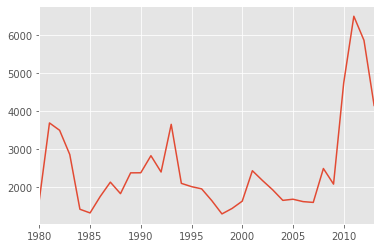

In [72]:
haiti.plot()

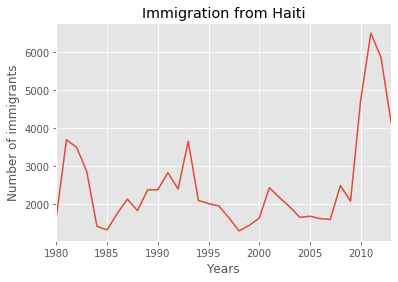

In [73]:
haiti.index = haiti.index.map(int) # changing the index values of haiti to integer type for plotting
haiti.plot(kind = 'line')
plt.title("Immigration from Haiti")
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

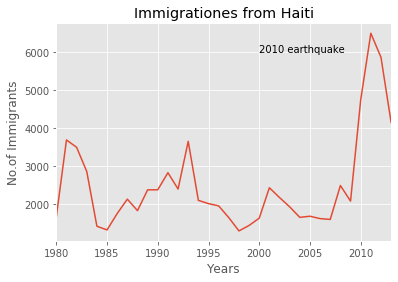

In [74]:
haiti.plot(kind = "line")
plt.title ("Immigrationes from Haiti")
plt.ylabel("No.of Immigrants")
plt.xlabel("Years")

plt.text(2000, 6000, "2010 earthquake")  # syntax plt.text(x,y,label)
plt.show()

In [75]:
df_CI = df_can.loc[['China','India'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


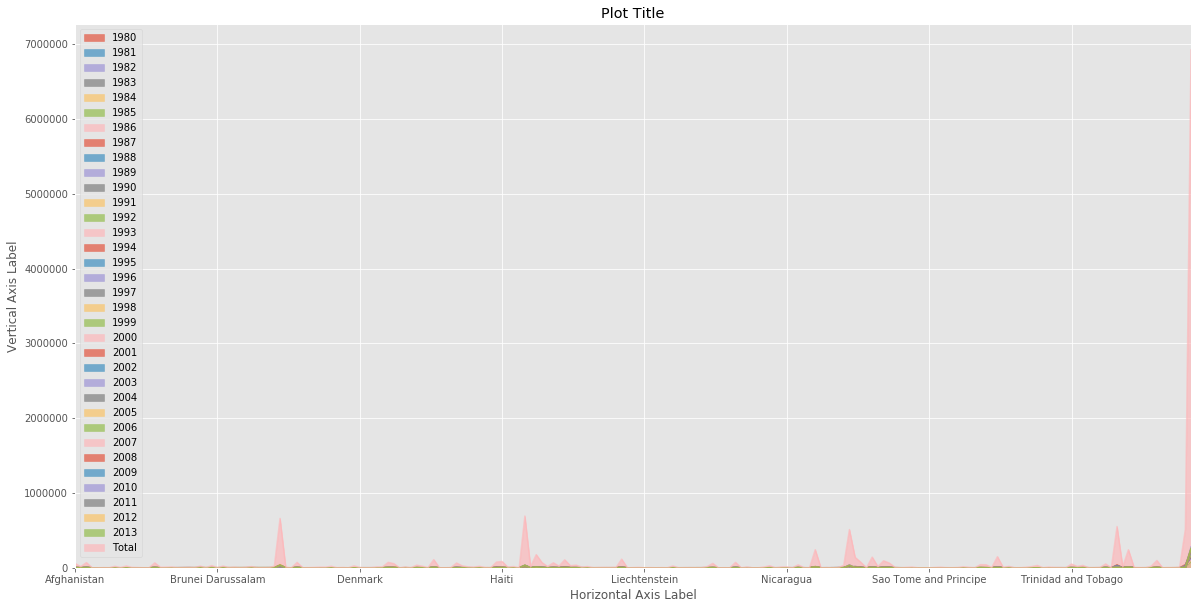

In [78]:
transparency = 1 - 0.35 
df_can.plot(kind='area', alpha=transparency, stacked=False, figsize=(20, 10))

plt.title('Plot Title')
plt.ylabel('Vertical Axis Label')
plt.xlabel('Horizontal Axis Label')

plt.show()

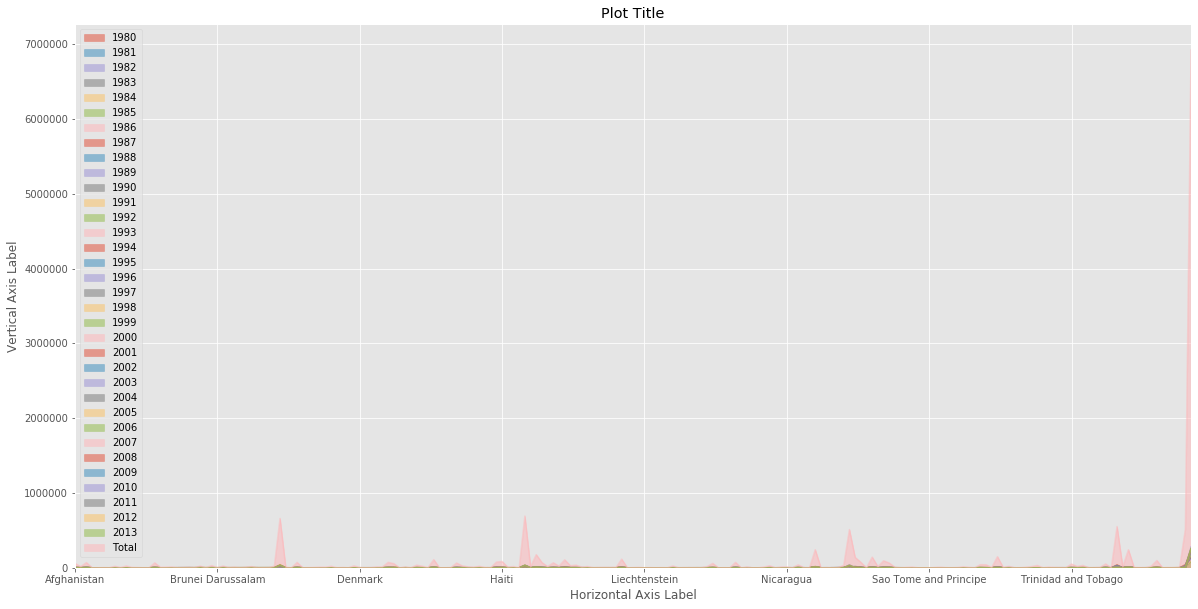

In [82]:
import matplotlib.pyplot as plt

df_can.plot(kind='area', stacked=False, figsize=(20, 10))

plt.title('Plot Title')
plt.ylabel('Vertical Axis Label')
plt.xlabel('Horizontal Axis Label')

plt.show()

In [87]:
count, bin_edges = np.histogram(df_can)
df_can.plot(kind='hist', xticks = count, bin_edges)

SyntaxError: positional argument follows keyword argument (<ipython-input-87-59688285bb7e>, line 2)

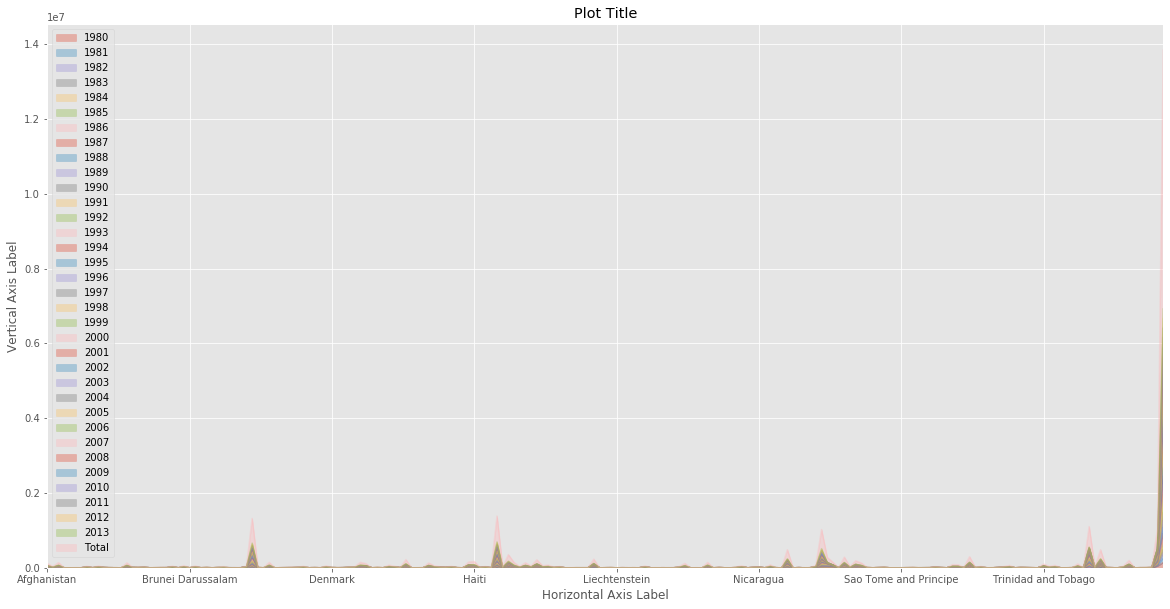

In [88]:
import matplotlib.pyplot as plt

transparency = 0.35 
df_can.plot(kind='area', alpha=transparency, figsize=(20, 10))

plt.title('Plot Title')
plt.ylabel('Vertical Axis Label')
plt.xlabel('Horizontal Axis Label')

plt.show()